# Generar graficas y reportes del total de personas  vacunadas y Generar un reporte parametrizado que pueda ingresar los datos de las fechas inicio y fin

In [3]:
import pyowm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pdfkit
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import numpy as np
import os
import dateutil.parser
import datetime as dt

### Importamos los datos, tomando solo las columnas de fecha y dosis total, creamos una lista de un rango de 8 fechas para su posterior grafico

In [6]:
data = pd.read_csv("S:/Universidad/10mo/Simulacion/PruebaPractica1/vacunas.csv")
data = data[['fecha','dosis_total']]
#data['fecha'] = pd.to_datetime(data['fecha'])
fechas=data.fecha[::8].tolist()
data.head(10)

fecha  dosis_total
0  21/01/2021            0
1  22/01/2021          108
2  27/01/2021         2982
3  04/02/2021         6228
4  17/02/2021         8190
5  24/02/2021        24492
6  01/03/2021        42114
7  04/03/2021        59316
8  05/03/2021        71148
9  08/03/2021        74472

### Realizamos un grafico de lineas para ver la curva de las vacunas usando seaborn y posteriormente guardamos el grafico, pasando parametros como el nombre de la imagen a guardar la orientacion y el tamaño de la caja del grafico

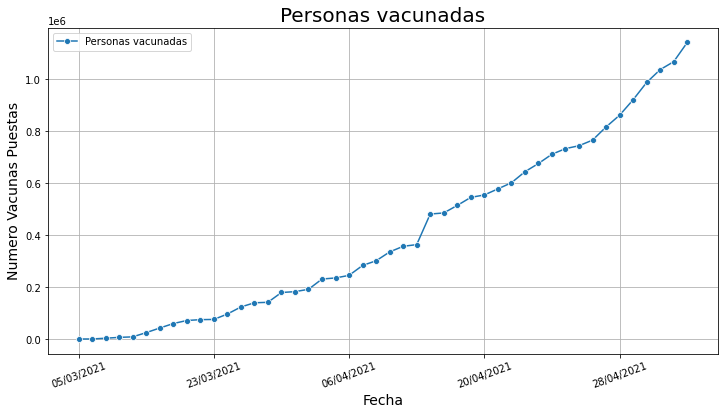

In [7]:
df_temp = data
fig = plt.figure()
sns_plot = sns.lineplot(data=df_temp, markers=True, dashes=False)
sns_plot.set_title(f'Personas vacunadas', fontsize=20)
sns_plot.set_xlabel('Fecha', fontsize=14)
sns_plot.set_ylabel('Numero Vacunas Puestas', fontsize=14)
sns_plot.set_xticklabels(fechas, rotation=20)
sns_plot.grid(True)

g=sns_plot.legend(labels=['Personas vacunadas'])
fig.set_size_inches(12, 6)

personas_vacunadas_plot="personas_vacunadas.png"
sns_plot.figure.savefig(personas_vacunadas_plot, 
                  dpi=300, facecolor='w', 
                  orientation='portrait',
                  bbox_inches='tight')



### De igual manera realizamos un grafico de barras que nos permitira ver el incremento de vacunas con seaborn en donde pasamos parametros como el nombre de la imagen, la orientacion y el tamaño de la caja del grafico

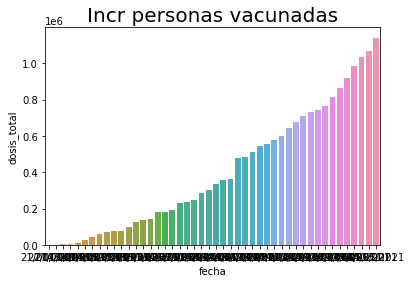

In [9]:
df_temp = data
fig = plt.figure()
sns_plot = sns.barplot(data=df_temp, x="fecha", y="dosis_total") 
sns_plot.set_title(f'Incr personas vacunadas', fontsize=20)

incremento_vacunas_plot="incremento_vacunas.png"
sns_plot.figure.savefig(incremento_vacunas_plot, 
                  dpi=300, facecolor='w', 
                  orientation='portrait',
                  bbox_inches='tight')



### A continuación creamos dos variables las cuales tendran la fecha del primer dia de la primera vacunacion y la fecha del ultima dia de la vacunacion, estos dos parametros los pasaremos luego para generar el reporte parametrizado

In [286]:
primer_dia = str(data.iloc[0]['fecha'])
ultimo_dia = str(data.iloc[len(data)-1]['fecha'])

### Creamos nuestro reporte parametrizado de tipo Html en el cual definiremos el titulo, el tipo de letra, los margenes, etc. Tambien le pasamos los parametros, fecha inicial y fecha final definidos en el anterior punto, asi como las imagenes creadas anteriormente, para su visualizacion.

In [287]:
# Template de HTML para añadir nuestra informacion y graficas
report_template = f'''
<!DOCTYPE html>
    <html>
      <head>
        <meta charset='utf-8'>
        <title>Personas Vacunadas</title>
        <link rel='stylesheet' href='report.css'>
          <style>
          h1 {{
          font-family: Arial;
          font-size: 300%;
          }}
          h2 {{
          font-family: Arial;
          font-size: 200%;
          }}
          @page {{
          size: 7in 9.25in;
          margin: 27mm 16mm 27mm 16mm;
          }}
          </style>                       
      </head>
      <h1 align="center">Personas vacunadas</h1>
      <h2 align="center">Fecha Inicial: {primer_dia}</h2>
      <h2 align="center">Fecha Final: {ultimo_dia}</h2>
        
      <figure>
        <img src="{personas_vacunadas_plot}" width="1200" height="600">
      </figure>
      <figure>
        <img src="{incremento_vacunas_plot}" width="1200" height="600">
      </figure>      
    </html>
'''

### Guardamos nuestro reporte html en un archivo llamado vacunas_reporte.html

In [288]:
html_report = f"vacunas_reporte.html"
with open(html_report, "w") as r:
    r.write(report_template)

### Para convertir nuestro reporte de html en pdf usamos pdfkit https://pypi.org/project/pdfkit/ y lo guardamos con el nombre de vacunas_reporte.pdf

In [ ]:
import pdfkit
# Usamos pdfkit para crear el pdf del reporte
pdfkit.from_file(html_report, f"vacunas_reporte.pdf")

# Generar grafico de pie por fabricante de la vacuna.

### Importamos los datos, tomando solo las columnas de vaccine y total

In [27]:
data2_1 = pd.read_csv("S:/Universidad/10mo/Simulacion/PruebaPractica1/fabricantes.csv")
data2 = data2_1[['vaccine','total']]
data2

vaccine   total
0      Pfizer/BioNTech    8190
1      Pfizer/BioNTech   16380
2      Pfizer/BioNTech   17550
3      Pfizer/BioNTech   31590
4              Sinovac   20000
5      Pfizer/BioNTech   73710
6   Oxford/AstraZeneca   84000
7      Pfizer/BioNTech   62010
8      Pfizer/BioNTech   65520
9      Pfizer/BioNTech   66690
10     Pfizer/BioNTech   53820
11             Sinovac  300000
12             Sinovac  700000
13     Pfizer/BioNTech   53820
14     Pfizer/BioNTech   54990
15  Oxford/AstraZeneca  336000
16     Pfizer/BioNTech   54990
17     Pfizer/BioNTech  100620

### Asignamos los valores de nuestros datos a nuestras 3 variables: Pfizer_BioNTech, Sinovac y Oxford_AstraZeneca. En recipe guardamos los nombres de las 3 fabricas de vacunas que luego mostraremos. La funcion fun nos ayudara a transformar el valor de los datos en porcentajes.

In [25]:
Pfizer_BioNTech = data2.loc[data2['vaccine'] == 'Pfizer/BioNTech'].count()[0]
Sinovac = data2.loc[data2['vaccine'] =='Sinovac'].count()[0]
Oxford_AstraZeneca= data2.loc[data2['vaccine'] == 'Oxford/AstraZeneca'].count()[0]

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))

recipe = ["Pfizer/BioNTech",
          "Sinovac",
          "Oxford/AstraZeneca"]

data = [Pfizer_BioNTech, Sinovac, Oxford_AstraZeneca]
pesos = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, pesos,
          title="Fabricantes",
          loc="center left",
          bbox_to_anchor=(1, 0, 1, 1))

plt.setp(autotexts, size=18)

ax.set_title("DISTRIBUIDORES DE VACUNAS")
plt.show()

# Generar histogramas de vacunas por mes de llega y fabricante.

In [33]:
data3 = data2_1[['arrived_at','vaccine']]
data3

arrived_at             vaccine
0   20/01/2021     Pfizer/BioNTech
1   17/02/2021     Pfizer/BioNTech
2   24/02/2021     Pfizer/BioNTech
3   03/03/2021     Pfizer/BioNTech
4   06/03/2021             Sinovac
5   10/03/2021     Pfizer/BioNTech
6   17/03/2021  Oxford/AstraZeneca
7   17/03/2021     Pfizer/BioNTech
8   24/03/2021     Pfizer/BioNTech
9   31/03/2021     Pfizer/BioNTech
10  05/04/2021     Pfizer/BioNTech
11  07/04/2021             Sinovac
12  10/04/2021             Sinovac
13  14/04/2021     Pfizer/BioNTech
14  21/04/2021     Pfizer/BioNTech
15  24/04/2021  Oxford/AstraZeneca
16  28/04/2021     Pfizer/BioNTech
17  04/05/2021     Pfizer/BioNTech

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = data3.vaccine
segmentos = data3.arrived_at
ax.bar(langs,segmentos)
plt.title('Mes de llegada por fabricante')
plt.show()

# Generar un modelo matemático de predicción basado en regresión, del procesos de vacunación en base al numero actual de vacunados (1 y 2 dosis) y a la llegada de nuevas vacunas.

## Generacion del modelo matematico de prediccion en base al numero actual de vacunados (1 y 2 dosis)

### Convertimos la fecha en ordinal para poder trabajar de mejor manera con la regresion

In [246]:
import datetime as dt
from datetime import datetime
data2_2 = pd.read_csv("S:/Universidad/10mo/Simulacion/PruebaPractica1/vacunas.csv")
data3 = data2_2[['fecha','dosis_total']]
fechas = data3['fecha']


data3['fecha'] = pd.to_datetime(data3['fecha'])
data3['fecha']=data3['fecha'].map(dt.datetime.toordinal)
data3

fecha  dosis_total
0   737811            0
1   737812          108
2   737817         2982
3   737882         6228
4   737838         8190
5   737845        24492
6   737793        42114
7   737883        59316
8   737913        71148
9   738005        74472
10  738036        75258
11  738097        95915
12  738127       123176
13  737862       139359
14  737864       141191
15  737870       178970
16  737872       182261
17  737873       191179
18  737875       230770
19  737876       235000
20  737878       244866
21  737794       283106
22  737884       301069
23  737914       335093
24  737945       356783
25  738006       363255
26  737894       480962
27  737895       485132
28  737896       514151
29  737897       545132
30  737898       554369
31  737899       577711
32  737900       601229
33  737901       643702
34  737902       675510
35  737903       711204
36  737904       732717
37  737905       743937
38  737906       765489
39  737907       816175
40  737908       861393
41  737909       920865
42  737910       987452
43  737795      1036794
44  737826      1067472
45  737885      1141262

### Describe del dataset

In [184]:
# Describiendo el dataset
data3.describe()

fecha   dosis_total
count      46.000000  4.600000e+01
mean   737895.913043  4.049774e+05
std        68.269670  3.394732e+05
min    737793.000000  0.000000e+00
25%    737870.500000  1.027302e+05
50%    737895.500000  3.180810e+05
75%    737906.750000  6.675580e+05
max    738127.000000  1.141262e+06

### Dividimos nuestro dataset en Train y Test

In [220]:
# Creando X & Y 
X = data3['fecha']
y = data3['dosis_total']

# Dividiendo las variables para entenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, 
                                                    test_size = 0.4, random_state = 100)

### Agregamos una constante para obtener la insterseccion

In [221]:
import statsmodels.api as sm

# Agregagando una constante para obtener una intersección
X_train_sm = sm.add_constant(X_train)

### Ajustamos la regresion usando OLS y visualizamos los parametros

In [222]:
# Ajustando la regresion usando 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualizamos los parametros
lr.params

const    4.848663e+08
fecha   -6.566117e+02
dtype: float64

### Mostramos los resultados de la regresion

In [223]:
#MOSTRAMOS LOS RESULTADOS DE LA REGRESION
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dosis_total   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.6560
Date:                Sat, 08 May 2021   Prob (F-statistic):              0.426
Time:                        12:08:48   Log-Likelihood:                -378.98
No. Observations:                  27   AIC:                             762.0
Df Residuals:                      25   BIC:                             764.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.849e+08   5.98e+08      0.811      0.425   -7.47e+08    1.72e+09
fecha       -656.6117    810.676     -0.810      0.426   -2326.229    1013.006
==============================================================================
Omnibus:                        2.526   Durbin-Watson:                   2.353
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.007
Skew:                           0.528   Prob(JB):                        0.367
Kurtosis:                       2.183   Cond. No.                     7.31e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Tendremos la siguiente ecuacion lineal dosis_total= 4.848663e+08 + (-6.566117) * fecha

### Visualizamos la linea de regresion

In [224]:
# Visualizando la linea de regresion
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1] * X_train, 'r')
plt.show()

### Prediciendo valor de y usando la data de entrenamiento de X y creando residuos del entrenamiento de y_train y prediciendo y_data

In [225]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

### Visualizando el histograma usando los valores del residuo

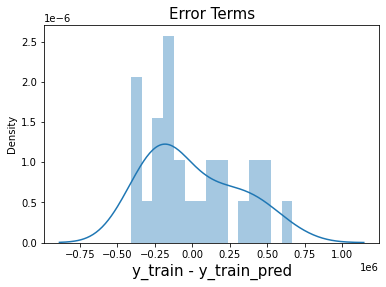

In [226]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

### Anadiendo una constante a X_test, Prediciendo los valores de y que corresponden a X_test_sm, Visualizando los 14 primeros valores predecidos

In [227]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr.predict(X_test_sm)
 
y_test_pred

6     422765.700547
17    370236.765734
20    366953.707308
38    348568.580124
42    345942.133383
45    362357.425512
5     388621.892919
29    354478.085290
27    355791.308661
33    351851.638550
0     410946.690214
41    346598.745068
32    352508.250235
35    350538.415179
21    422109.088862
7     363670.648883
43    421452.477177
18    368923.542364
25    282907.411608
dtype: float64

### Resultados de la regresion de test

In [229]:
# Visualizando la linea de regresion con el set de test
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [245]:
plt.title('Vacunacion 21/01/2021 HASTA 04/05/2021')
plt.plot(fechas,y)

### Resultados de la prediccion

In [333]:
mes1 = pd.Timestamp(year = 2021,  month = 6, day = 1) 
mes1=mes1.toordinal()

mes2 = pd.Timestamp(year = 2021,  month = 7, day = 1) 
mes2=mes2.toordinal()

mes3 = pd.Timestamp(year = 2021,  month = 8, day = 1) 
mes3=mes3.toordinal()

mes4 = pd.Timestamp(year = 2021,  month = 9, day = 1) 
mes4=mes4.toordinal()

mes1_vacunados=(lr.params[0] + lr.params[1] * mes1)*10
mes2_vacunados=(lr.params[0] + lr.params[1] * mes2)*10
mes3_vacunados=(lr.params[0] + lr.params[1] * mes3)*10
mes4_vacunados=(lr.params[0] + lr.params[1] * mes4)*10

print("Vacunados en el mes de Junio: ",mes1_vacunados)
print("Vacunados en el mes de Julio: ",mes2_vacunados)
print("Vacunados en el mes de Agosto: ",mes3_vacunados)
print("Vacunados en el mes de Septiembre: ",mes4_vacunados)
print()

mesn = pd.Timestamp(year = 2022,  month = 6, day = 1) 
mes_predit=mesn
mesn=mesn.toordinal()

mesn_vacunados=(lr.params[0] + lr.params[1] * mesn)*10
print("Fecha predictiva (tentativa) en la que todos los ecuatorianos podrian estar vacunados: ",mes_predit)
print("Con un numero predictivo (tentativo) de total de vacunados de: ",mesn_vacunados)

Vacunados en el mes de Junio:  1784311.771056652
Vacunados en el mes de Julio:  2231539.4818639755
Vacunados en el mes de Agosto:  2693674.7830295563
Vacunados en el mes de Septiembre:  3155810.084197521

Fecha predictiva (tentativa) en la que todos los ecuatorianos podrian estar vacunados:  2022-06-01 00:00:00
Con un numero predictivo (tentativo) de total de vacunados de:  7225582.252542973


## Generacion de un modelo matematico de prediccion basado en regresion de la llegada de nuevas vacunas

In [4]:
import datetime as dt
from datetime import datetime
data2_3 = pd.read_csv("S:/Universidad/10mo/Simulacion/PruebaPractica1/fabricantes.csv")
data4 = data2_3[['arrived_at','total']]
fechas = data4['arrived_at']


data4['arrived_at'] = pd.to_datetime(data4['arrived_at'])
data4['arrived_at']=data4['arrived_at'].map(dt.datetime.toordinal)
data4

arrived_at   total
0       737810    8190
1       737838   16380
2       737845   17550
3       737852   31590
4       737944   20000
5       738066   73710
6       737866   84000
7       737866   62010
8       737873   65520
9       737880   66690
10      737914   53820
11      737975  300000
12      738067  700000
13      737894   53820
14      737901   54990
15      737904  336000
16      737908   54990
17      737885  100620

In [5]:
# Describiendo el dataset
data4.describe()

arrived_at          total
count      18.000000      18.000000
mean   737904.888889  116660.000000
std        70.221405  170984.263191
min    737810.000000    8190.000000
25%    737866.000000   37147.500000
50%    737889.500000   58500.000000
75%    737912.500000   81427.500000
max    738067.000000  700000.000000

In [6]:
# Creando X & Y 
X = data4['arrived_at']
y = data4['total']

# Dividiendo las variables para entenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, 
                                                    test_size = 0.4, random_state = 100)

In [7]:
import statsmodels.api as sm

# Agregagando una constante para obtener una intersección
X_train_sm = sm.add_constant(X_train)

In [8]:
# Ajustando la regresion usando 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualizamos los parametros
lr.params

const        -1.099915e+09
arrived_at    1.490759e+03
dtype: float64

In [9]:
#MOSTRAMOS LOS RESULTADOS DE LA REGRESION
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     4.564
Date:                Mon, 10 May 2021   Prob (F-statistic):             0.0652
Time:                        11:32:05   Log-Likelihood:                -134.40
No. Observations:                  10   AIC:                             272.8
Df Residuals:                       8   BIC:                             273.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -1.1e+09   5.15e+08     -2.136      0.065   -2.29e+09    8.75e+07
arrived_at  1490.7590    697.829      2.136      0.065    -118.437    3099.955
==============================================================================
Omnibus:                        1.170   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.270
Skew:                           0.402   Prob(JB):                        0.874
Kurtosis:                       2.947   Cond. No.                     6.47e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

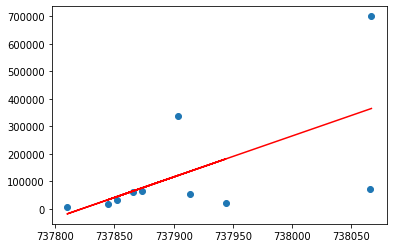

In [10]:
# Visualizando la linea de regresion
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1] * X_train, 'r')
plt.show()

In [11]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

In [12]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [13]:
#Valores predecidos
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr.predict(X_test_sm)
 
y_test_pred

9      86004.116871
11    227626.225294
16    127745.369880
13    106874.743376
1      23392.237358
14    117310.056628
6      65133.490367
17     93457.912052
dtype: float64

In [14]:
# Visualizando la linea de regresion con el set de test
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [15]:
plt.title('Llegada de vacunas desde 20/01/2021 HASTA 04/05/2021')
plt.plot(fechas,y)

In [16]:
mes1 = pd.Timestamp(year = 2021,  month = 6, day = 1) 
mes1=mes1.toordinal()

mes2 = pd.Timestamp(year = 2021,  month = 7, day = 1) 
mes2=mes2.toordinal()

mes3 = pd.Timestamp(year = 2021,  month = 8, day = 1) 
mes3=mes3.toordinal()


mes1_vacunados=lr.params[0] + lr.params[1] * mes1
mes2_vacunados=lr.params[0] + lr.params[1] * mes2
mes3_vacunados=lr.params[0] + lr.params[1] * mes3

print("Llegadas de vacunas en el mes de Junio: ",mes1_vacunados)
print("Llegadas de vacunas en el mes de Julio: ",mes2_vacunados)
print("Llegadas de vacunas en el mes de Agosto: ",mes3_vacunados)

Llegadas de vacunas en el mes de Junio:  178431.17710494995
Llegadas de vacunas en el mes de Julio:  223153.9481856823
Llegadas de vacunas en el mes de Agosto:  269367.4783024788


## Desarrollar y generar un proceso de comparación con al menos dos países (1. Latinoamérica,  1. Europa).

### Generacion de la regresion con los datos de Belgica

In [99]:
import datetime as dt
from datetime import datetime
data2_4 = pd.read_csv("S:/Universidad/10mo/Simulacion/PruebaPractica1/Belgium_Vacunas.csv")
data5 = data2_4[['date','total_vaccinations']]
fechasB = data5['date']


data5['date'] = pd.to_datetime(data5['date'])
data5['date']=data5['date'].map(dt.datetime.toordinal)
data5.head(10)

date  total_vaccinations
0  737787               298.0
1  737788               299.0
2  737789               776.0
3  737790               786.0
4  737791               794.0
5  737881               796.0
6  737911              2499.0
7  737942              6382.0
8  737972             14567.0
9  738003             23811.0

In [64]:
# Describiendo el dataset
data5.describe()

date  total_vaccinations
count     130.000000        1.300000e+02
mean   737895.276923        1.424531e+06
std        87.736658        1.301340e+06
min    737787.000000        2.980000e+02
25%    737834.250000        3.383950e+05
50%    737874.500000        9.923045e+05
75%    737913.750000        2.207428e+06
max    738128.000000        4.591359e+06

In [70]:
# Creando X & Y 
XB = data5['date']
yB = data5['total_vaccinations']

# Dividiendo las variables para entenamiento y prueba
from sklearn.model_selection import train_test_split
X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, train_size = 0.6, 
                                                    test_size = 0.4, random_state = 100)

In [71]:
import statsmodels.api as sm

# Agregagando una constante para obtener una intersección
X_train_smB = sm.add_constant(X_trainB)

In [73]:
# Ajustando la regresion usando 'OLS'
lrB = sm.OLS(y_trainB, X_train_smB).fit()

# Visualizamos los parametros
lrB.params

const   -2.537489e+09
date     3.440753e+03
dtype: float64

In [74]:
#MOSTRAMOS LOS RESULTADOS DE LA REGRESION
lrB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_vaccinations   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4.167
Date:                Mon, 10 May 2021   Prob (F-statistic):             0.0447
Time:                        11:54:10   Log-Likelihood:                -1206.5
No. Observations:                  78   AIC:                             2417.
Df Residuals:                      76   BIC:                             2422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.537e+09   1.24e+09     -2.040      0.045   -5.01e+09   -6.04e+07
date        3440.7533   1685.465      2.041      0.045      83.859    6797.648
==============================================================================
Omnibus:                        7.870   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.359
Skew:                           0.793   Prob(JB):                       0.0153
Kurtosis:                       2.760   Cond. No.                     6.33e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

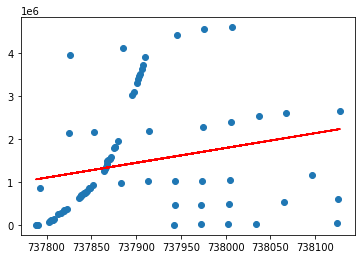

In [75]:
# Visualizando la linea de regresion
plt.scatter(X_trainB, y_trainB)
plt.plot(X_trainB, lrB.params[0] + lrB.params[1] * X_trainB, 'r')
plt.show()

In [76]:
y_train_predB = lrB.predict(X_train_smB)

resB = (y_trainB - y_train_predB)

In [77]:
fig = plt.figure()
sns.distplot(resB, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [128]:
#Valores predecidos
X_test_smB = sm.add_constant(X_testB)

y_test_predB = lr.predict(X_test_smB)
 
y_test_predB.head(10)

11     360303.779500
106    108365.502412
105    106874.743376
73      59170.454223
92     -42201.160227
21     -18349.015650
111    115819.297592
124     47244.381935
25     -12385.979506
51      26373.755430
dtype: float64

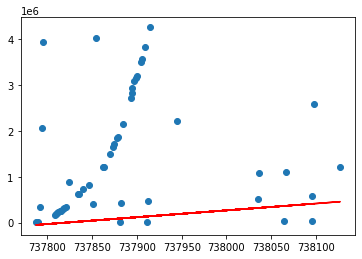

In [79]:
# Visualizando la linea de regresion con el set de test
plt.scatter(X_testB, y_testB)
plt.plot(X_testB, y_test_predB, 'r')
plt.show()

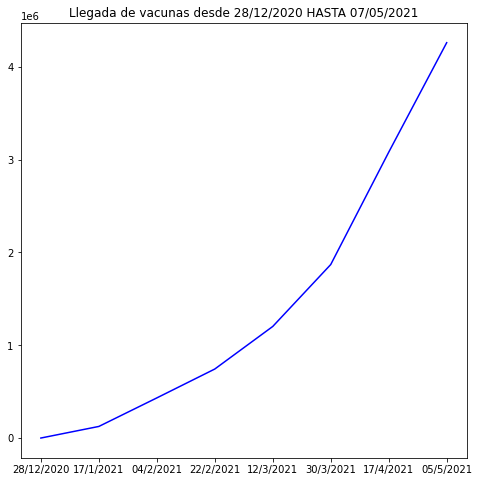

In [114]:
plt.figure(figsize=(8,8))
plt.title('Llegada de vacunas desde 28/12/2020 HASTA 07/05/2021')
plt.plot(fechasB[::18],yB[::18],color='blue')

### Generacion de la regresion con los datos de Colombia

In [118]:
import datetime as dt
from datetime import datetime
data2_5 = pd.read_csv("S:/Universidad/10mo/Simulacion/PruebaPractica1/Colombia_Vacunas.csv")
data6 = data2_5[['date','total_vaccinations']]
fechasC = data6['date']


data6['date'] = pd.to_datetime(data6['date'])
data6['date']=data6['date'].map(dt.datetime.toordinal)
data6.head(10)

date  total_vaccinations
0  737838                18.0
1  737839              9935.0
2  737840             21307.0
3  737841             33140.0
4  737842             39827.0
5  737843             45166.0
6  737844             48150.0
7  737845             50524.0
8  737846             66157.0
9  737847             81333.0

### Describiendo el dataset de Belgica

In [117]:
# Describiendo el dataset
data6.describe()

date  total_vaccinations
count      72.000000        7.200000e+01
mean   737898.486111        1.945312e+06
std        73.868363        1.718451e+06
min    737793.000000        1.800000e+01
25%    737851.250000        2.921528e+05
50%    737877.500000        1.430934e+06
75%    737907.250000        3.376440e+06
max    738128.000000        6.096661e+06

### Describiendo el dataset de Colombia

In [25]:
# Describiendo el dataset
data6.describe()

date  total_vaccinations
count      72.000000        7.200000e+01
mean   737898.486111        1.945312e+06
std        73.868363        1.718451e+06
min    737793.000000        1.800000e+01
25%    737851.250000        2.921528e+05
50%    737877.500000        1.430934e+06
75%    737907.250000        3.376440e+06
max    738128.000000        6.096661e+06

In [119]:
# Creando X & Y 
XC = data6['date']
yC = data6['total_vaccinations']

# Dividiendo las variables para entenamiento y prueba
from sklearn.model_selection import train_test_split
X_trainC, X_testC, y_trainC, y_testC = train_test_split(XC, yC, train_size = 0.6, 
                                                    test_size = 0.4, random_state = 100)

In [120]:
import statsmodels.api as sm

# Agregagando una constante para obtener una intersección
X_train_smC = sm.add_constant(X_trainC)

In [121]:
# Ajustando la regresion usando 'OLS'
lrC = sm.OLS(y_trainC, X_train_smC).fit()

# Visualizamos los parametros
lrC.params

const   -3.821369e+09
date     5.181297e+03
dtype: float64

In [122]:
#MOSTRAMOS LOS RESULTADOS DE LA REGRESION
lrC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_vaccinations   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.090
Date:                Mon, 10 May 2021   Prob (F-statistic):              0.156
Time:                        12:11:49   Log-Likelihood:                -675.94
No. Observations:                  43   AIC:                             1356.
Df Residuals:                      41   BIC:                             1359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.821e+09   2.64e+09     -1.445      0.156   -9.16e+09    1.52e+09
date        5181.2971   3584.058      1.446      0.156   -2056.855    1.24e+04
==============================================================================
Omnibus:                        4.384   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.449
Skew:                           0.570   Prob(JB):                        0.178
Kurtosis:                       2.210   Cond. No.                     7.69e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

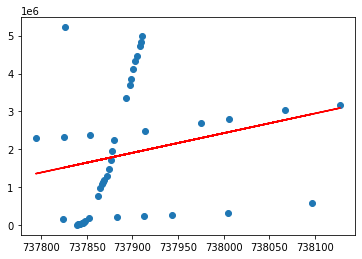

In [123]:
# Visualizando la linea de regresion
plt.scatter(X_trainC, y_trainC)
plt.plot(X_trainC, lrC.params[0] + lrC.params[1] * X_trainC, 'r')
plt.show()

In [124]:
y_train_predC = lrB.predict(X_train_smC)

resC = (y_trainC - y_train_predC)

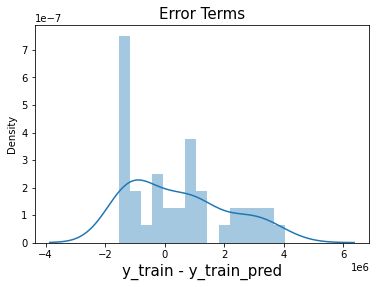

In [125]:
fig = plt.figure()
sns.distplot(resC, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [127]:
#Valores predecidos
X_test_smC = sm.add_constant(X_testC)

y_test_predC = lr.predict(X_test_smC)
 
y_test_predC.head(10)

55    109856.261448
11     39790.586755
32     71096.526511
26     62151.972295
28     65133.490367
21    363285.297572
61    118800.815664
23    454221.598770
41     84513.357835
65    126254.610844
dtype: float64

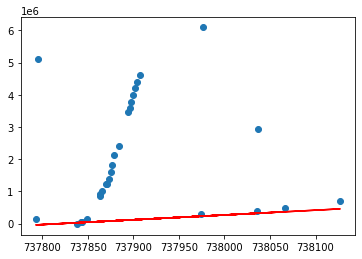

In [129]:
# Visualizando la linea de regresion con el set de test
plt.scatter(X_testC, y_testC)
plt.plot(X_testC, y_test_predC, 'r')
plt.show()

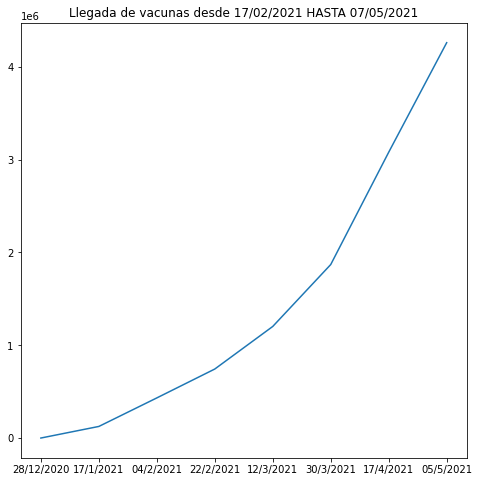

In [132]:
plt.figure(figsize=(8,8))
plt.title('Llegada de vacunas desde 17/02/2021 HASTA 07/05/2021')
plt.plot(fechasB[::18],yB[::18])

### Comparacion de la regresion Train de personas vacunadas entre Belgica (B) y Colombia (C)

Text(0.5, 1.0, 'Colombia')

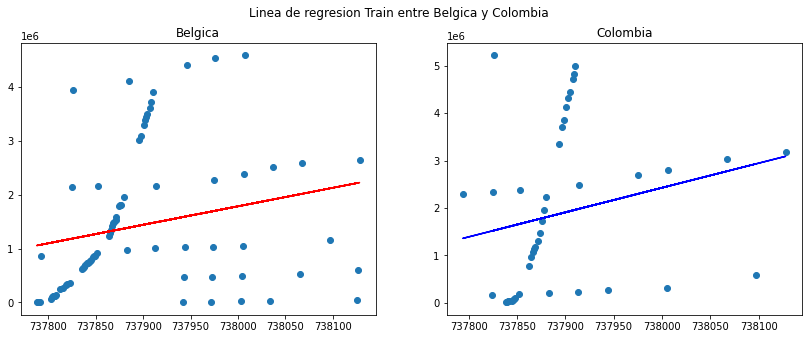

In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,5))
fig.suptitle('Linea de regresion Train entre Belgica y Colombia')
ax1.scatter(X_trainB, y_trainB)
ax1.plot(X_trainB, lrB.params[0] + lrB.params[1] * X_trainB, 'r')
ax1.set_title('Belgica')

ax2.scatter(X_trainC, y_trainC)
ax2.plot(X_trainC, lrC.params[0] + lrC.params[1] * X_trainC, 'b')
ax2.set_title('Colombia')

### Comparacion de la regresion Test de personas vacunadas entre Belgica (B) y Colombia (C)

Text(0.5, 1.0, 'Colombia')

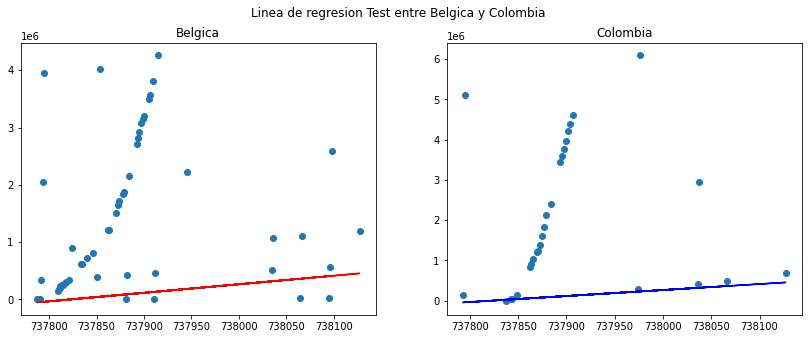

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,5))
fig.suptitle('Linea de regresion Test entre Belgica y Colombia')
ax1.scatter(X_testB, y_testB)
ax1.plot(X_testB, y_test_predB, 'r')
ax1.set_title('Belgica')

ax2.scatter(X_testC, y_testC)
ax2.plot(X_testC, y_test_predC, 'b')
ax2.set_title('Colombia')

### Comparacion de vacunacion entre Belgica (B) y Colombia (C)

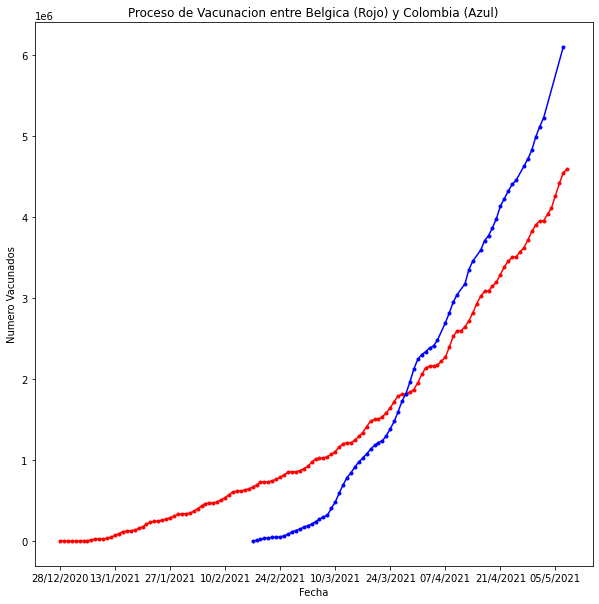

In [175]:
plt.figure(figsize=(10,10))
plt.title('Proceso de Vacunacion entre Belgica (Rojo) y Colombia (Azul)')

plt.plot(fechasB, yB, 'r.-')
plt.plot(fechasC, yC, 'b.-')

plt.xticks(fechasB[::14].tolist())
plt.xlabel('Fecha')
plt.ylabel('Numero Vacunados')
plt.show()

## Opinion

### La simulacion es muy importante al momento de analizar, procesar y presentar informacion, ya que nos permite hacer simulaciones para tener una estimacion sobre los sucesos que puedan ocurrir. Mas especificamente la simulacion de contagios y vacunacion pueden evitar futuros contagios masivos.

## Conclusiones

### Se puede concluir que la cantidad de datos puede influir directamente a un mejor entrenamiento del algoritmo asi como tambien una mejor prediccion. Se puede observar que existe una brecha muy grande entre paises de Europa y Latinoamerica como es el caso de Belgica y Colombia en el tema de vacunaciones. Por otro lado el proceso de vacunacion de Ecuador ha sido muy lento con respecto a otros paises, ya que la llegada de vacunas no han sido muy grandes.

### PaperMill puede llegar a ser una gran herramienta al momento de generar reportes y graficas permitiendo graficar y crear documentos al mismo tiempo, permitiendo pasar parametros necesarios para su futura exposicion.

## Recomendaciones

### Revisar la documentacion vista en clases, asi como ejercicios realizados tanto dentro como fuera de los visto en clases.